<a href="https://colab.research.google.com/github/DharmikPatel916/CE888/blob/main/Praticals/Week%203/bank_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
#Loading the Libraries
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import itertools
import sklearn

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.model_selection import cross_val_score,cross_val_predict
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import f1_score
from sklearn.metrics import make_scorer, confusion_matrix
from sklearn.dummy import DummyRegressor, DummyClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV

In [2]:
# Load the data
df = pd.read_csv('https://raw.githubusercontent.com/albanda/CE888/master/lab3/bank-additional-full.csv', delimiter=";")
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
# converting label into numbers
df[["y"]] = df[["y"]].apply(LabelEncoder().fit_transform)
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


In [4]:
# Creating dummies to convert the categorical columns to numerical columns
df_dummies = pd.get_dummies(df)
df_dummies.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0


In [5]:
# Dropping the duration column
df_dummies.drop(['duration'],axis = 1, inplace = True)

In [6]:
# Checking for missing values
df_dummies.isnull().sum()   

age                     0
campaign                0
pdays                   0
previous                0
emp.var.rate            0
                       ..
day_of_week_tue         0
day_of_week_wed         0
poutcome_failure        0
poutcome_nonexistent    0
poutcome_success        0
Length: 63, dtype: int64

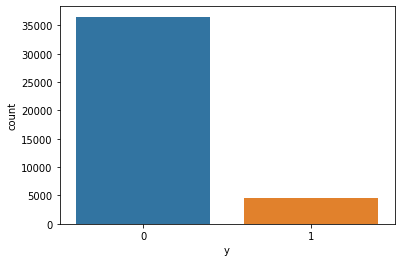

In [7]:
# creating the plot
sns.countplot(x="y", data=df)
plt.show()

In [8]:
#Calculating the imbalance in the dataset
values=df_dummies['y'].value_counts()
values

0    36548
1     4640
Name: y, dtype: int64

In [9]:
#split dataset in features and target variable
X = df_dummies.drop('y',axis=1) # Features
y = df_dummies.y # Target variable

In [13]:
#Spliting the data into test and train set
X_train, X_test, y_train, y_test = train_test_split(X, y,stratify=y,test_size=0.20,random_state=50)

In [17]:
# Create a Random Forest Classifier
RF_Classifier = RandomForestClassifier(n_estimators=100,max_depth=3)
# Train the model using the training sets
RF_Classifier.fit(X_train, y_train)
# Predict the response for test dataset
y_pred = RF_Classifier.predict(X_test)
print("F1 score:", f1_score(y_test, y_pred))

F1 score: 0.2555456965394854


In [18]:
# Checking the cross validation scores and prediction
score=cross_val_score(RF_Classifier, X_train, y_train, cv=10,)
predictions = cross_val_predict(RF_Classifier, X_train, y_train, cv=10)
f1_score_clf = f1_score(y_train,predictions)
print('Cross-Predicted f1_score:', f1_score_clf)

Cross-Predicted f1_score: 0.24449438202247187


In [19]:
# Checking the cross validation average scores
score=cross_val_score(RF_Classifier, X_train, y_train, cv=10,scoring="f1")
print('cross_val_mean:', score.mean())

cross_val_mean: 0.24376145392293574


In [20]:
dummy_clf = DummyClassifier(strategy='stratified')
dummy_clf.fit(X_train, y_train)
print("Dummy f1_score: " , f1_score(y_test, dummy_clf.predict(X_test)))

Dummy f1_score:  0.12419006479481641


In [21]:
# Using the Grid search CV
# defining parameter range 
param_grid = {'n_estimators': [100,200],
              'max_features': ['auto'],
              'max_depth' : [5,10],
              'criterion' :['gini', 'entropy']
              }
grid_search = GridSearchCV(estimator=RF_Classifier, param_grid=param_grid, cv= 5)
# fitting the model for grid search 
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=3,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              random_s

In [22]:
# Fitting Random Forest Classifier to the dataset
# Create a Random Forest Classifier
RF_Classifier = RandomForestClassifier(n_estimators=200,max_depth=10,max_features='auto',criterion='entropy')
# Train the model using the training sets
RF_Classifier.fit(X_train, y_train)
# Predict the response for test dataset
y_pred = RF_Classifier.predict(X_test)
print("F1 score:", f1_score(y_test, y_pred,average='weighted'))

F1 score: 0.8792224067597275


In [27]:
# Checking the cross validation scores and prediction
score=cross_val_score(RF_Classifier, X_train, y_train, cv=10,)
predictions = cross_val_predict(RF_Classifier, X_train, y_train, cv=10)
f1_score_clf = f1_score(y_train,predictions,average='weighted')
print('Cross-Predicted f1_score:', f1_score_clf)

Cross-Predicted f1_score: 0.8774943295661163


In [28]:
# Checking the cross validation average scores
score=cross_val_score(RF_Classifier, X_train, y_train, cv=10,scoring="f1")
print('cross_val_mean:', score.mean())

cross_val_mean: 0.32593947173491855


In [31]:
# Assigning the column names to features
features=['age', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'default_no', 'default_unknown', 'default_yes',
       'housing_no', 'housing_unknown', 'housing_yes', 'loan_no',
       'loan_unknown', 'loan_yes', 'contact_cellular', 'contact_telephone',
       'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'day_of_week_fri', 'day_of_week_mon', 'day_of_week_thu',
       'day_of_week_tue', 'day_of_week_wed', 'poutcome_failure',
       'poutcome_nonexistent', 'poutcome_success']

# Feature importance
importances = RF_Classifier.feature_importances_
std = np.std([tree.feature_importances_ for tree in RF_Classifier.estimators_],axis=0)
indices = np.argsort(importances)[::-1]
print(indices)
# Print the feature ranking
print("Feature ranking:")
for f in range(X.shape[1]):
    print("%d. %s (%f)" % (f + 1, features[indices[f]],  importances[indices[f]]))

[ 8  7  4  2  6  5 61  0  3  1 42 50 43 60 52 59 49 33 34 55 44 10 31 48
 23 54 36 56 22 38 58 57 14 28  9 39 41 27 17 18 21 30 25 47 16 53 32 13
 26 15 12 45 19 11 51 37 40 20 46 24 29 35]
Feature ranking:
1. nr.employed (0.175908)
2. euribor3m (0.137629)
3. emp.var.rate (0.094680)
4. pdays (0.075890)
5. cons.conf.idx (0.059039)
6. cons.price.idx (0.057522)
7. poutcome_nonexistent (0.051212)
8. age (0.042208)
9. previous (0.021373)
10. campaign (0.018663)
11. loan_yes (0.017358)
12. month_mar (0.017348)
13. contact_cellular (0.014974)
14. poutcome_failure (0.013629)
15. month_nov (0.012916)
16. day_of_week_wed (0.010925)
17. month_jun (0.010149)
18. education_unknown (0.008606)
19. default_no (0.008309)
20. day_of_week_fri (0.007578)
21. contact_telephone (0.007375)
22. job_admin. (0.006194)
23. education_professional.course (0.005855)
24. month_jul (0.005819)
25. marital_married (0.005300)
26. month_sep (0.005234)
27. default_yes (0.004993)
28. day_of_week_mon (0.004899)
29. marital_